Implémentation de RISE


**objectifs**
 - reproduire les résultats du papier de recherche avec CLIP_Surgery

In [1]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-ut_ekugd
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-ut_ekugd
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
import torch
import clip
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import torchvision.transforms as T

In [4]:
# Configuration
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cpu


100%|███████████████████████████████████████| 335M/335M [01:07<00:00, 5.22MiB/s]


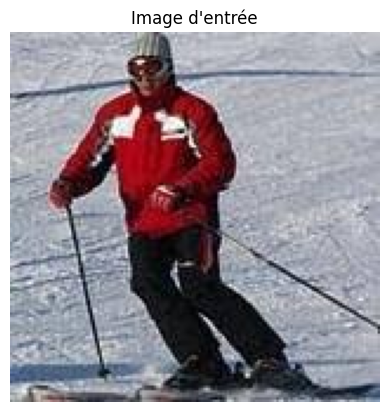

In [5]:
model, preprocess = clip.load("ViT-B/16", device=device)
model.eval()

text_prompt = "a women skiing"
text_token = clip.tokenize([text_prompt]).to(device)

image_path = "./assets/ski.jpg"
orig_img_pil = Image.open(image_path).convert("RGB")
image_tensor = preprocess(orig_img_pil).unsqueeze(0).to(device)

plt.imshow(orig_img_pil)
plt.title("Image d'entrée")
plt.axis("off")
plt.show()
